In [292]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mp
import csv

In [293]:
hsptldf = pd.read_csv('hospitaldata.csv', sep=',', na_values='-')

# Question # 1



In [294]:
hsptldf.columns = hsptldf.columns.str.replace('.',"")

# # Question # 2

In [295]:

#separating days from Date and creating a new column
hsptldf['day'] = hsptldf['Date'].str.extract('([A-Z]\w{0,})', expand=True)
#applying groupby function and getting the count of each group in 'count' column
grpd =hsptldf.groupby(["day"]).size().reset_index(name='count')
#printing the day with most visit and its count
grpd.ix[grpd['count'].idxmax()]



day      Monday
count        51
Name: 1, dtype: object

# # Question 3

In [296]:

hsptldf.Age.dtype
#converting the type of Age to nymeric 
hsptldf.Age = pd.to_numeric(hsptldf.Age, errors = "coerce")
hsptldf.Age.dtype
# calculating mean and it it the average age of visiting patient
np.mean(hsptldf.Age)

32.734375

##  Question 4

In [288]:
# getting the total child patient within the age bracket and then finding total num of child patients
child_patient =len( filter(lambda x: (x >= 1) and (x <= 12 ), hsptldf.Age ))
child_patient

23

# # Question 5

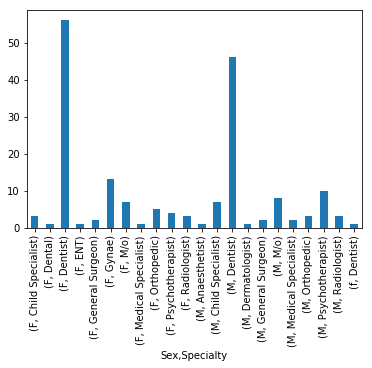

In [289]:
import matplotlib.pyplot as mp

#adding count column 
hsptldf['count'] = 1

grp_specialty = hsptldf.groupby(['Sex','Specialty' ])['count'].sum()
grp_specialty.plot(kind = 'bar')


# # Question 6

In [297]:
#cleaning data in total charges and then converting TotalCharges to numeric
hsptldf.TotalCharges = hsptldf.TotalCharges.replace("Cancelled", np.nan) 
hsptldf.TotalCharges = pd.to_numeric(hsptldf.TotalCharges , errors = "coerce")
hsptldf.TotalCharges.dtype
doc_earning = hsptldf[["ConsultingDoctor","TotalCharges"]].copy()
#summing the total charges and  sorting in desecnding 
highest_earning = doc_earning.groupby(['ConsultingDoctor']).sum().sort_values(by= 'TotalCharges', ascending= False)
highest_earning.head()


,TotalCharges
ConsultingDoctor,
Dr Alaf Khan,513050.0
Dr Kinza Alam,76700.0
Dr Saad,52000.0
Dr Ali,26100.0
Dr Fakiha,22600.0


# # Question 7

In [298]:
proc_earning = hsptldf[["Procedure","TotalCharges"]].copy()
#summing the total charges and  sorting in desecnding 
max__earning__proc =proc_earning.groupby(['Procedure']).sum().sort_values(by= 'TotalCharges', ascending= False)
max__earning__proc.head()

,TotalCharges
Procedure,
Orthodontics,240000.0
Consultation,83950.0
22 Unit Bridge,69500.0
C Section,65000.0
Operation,50000.0


# # Question 10

In [301]:
patient = hsptldf.copy()
patient['rep_count'] = 1
 
patient = patient.groupby(['id'])['rep_count'].agg({'rep_count': "count"})
#getting patients with count greater than 1
patient = patient.loc[patient['rep_count'] >1 ]
# total num of repeated visitors 
len(patient.reset_index())

37

# # Question 8


In [281]:
vis_time = hsptldf[['Time']].copy()
vis_time.Time[0] = vis_time.Time[0]+"AM"
hsptldf.Time = vis_time.Time
# removing garbage
hsptldf.Time = hsptldf.Time.replace('-',np.nan)
# converting to standard format
hsptldf.Time = pd.to_datetime(hsptldf.Time,format = '%I:%M%p')
hsptldf['hour'] =hsptldf.Time.dt.hour
max_freq_hr = hsptldf[['hour']].copy()
max_freq_hr['viz_count']=1
#grouping by hour and then counting the visit and sorting them in desecding order
max_freq_hr = max_freq_hr.groupby(['hour']).agg({'viz_count':"count"}).sort_values(by=['viz_count'],ascending=False)
#max_freq_hr = max_freq_hr.sort_values(by=['Visits'],ascending=False)
#highest frequency hour
max_freq_hr.head(n=1)

,viz_count
hour,
13.0,29


## Question 11


In [306]:
#printing patient with repeated values that we have calculated in Question 10
patient

,rep_count
id,
1,12
4,2
12,2
13,2
17,4
20,2
25,2
40,2
45,3
